In [1]:
%matplotlib inline
%run 'bin/notebook_utils.py'

In [2]:
exp1_sessions = pd.read_csv('../data/exp1/sessions.csv', index_col=0)
exp1_pilots = pd.read_csv('../data/exp1/pilots.csv', index_col=0)
exp1_units = pd.read_csv('../data/exp1/units.csv', index_col=0)

exp2_sessions = pd.read_csv('../data/exp2/sessions.csv', index_col=0)
exp2_pilots = pd.read_csv('../data/exp2/pilots.csv', index_col=0)
exp2_units = pd.read_csv('../data/exp2/units.csv', index_col=0)

exp3_sessions = pd.read_csv('../data/exp3/sessions.csv', index_col=0)
exp3_pilots = pd.read_csv('../data/exp3/pilots.csv', index_col=0)
exp3_units = pd.read_csv('../data/exp3/units.csv', index_col=0)

In [3]:
print 'Experiment 1: Baseline: Total number of successful runs: %s' % exp1_sessions.shape[0]
print 'Experiment 1: Baseline: Total number of pilots: %s' % exp1_pilots.shape[0]
print 'Experiment 1: Baseline: Total number of units: %s\n' % exp1_units.shape[0]

print 'Experiment 2: Baseline: Total number of successful runs: %s' % exp2_sessions.shape[0]
print 'Experiment 2: Baseline: Total number of pilots: %s' % exp2_pilots.shape[0]
print 'Experiment 2: Baseline: Total number of units: %s\n' % exp2_units.shape[0]

print 'Experiment 3: Baseline: Total number of successful runs: %s' % exp3_sessions.shape[0]
print 'Experiment 3: Baseline: Total number of pilots: %s' % exp3_pilots.shape[0]
print 'Experiment 3: Baseline: Total number of units: %s\n' % exp3_units.shape[0]

Experiment 1: Baseline: Total number of successful runs: 26
Experiment 1: Baseline: Total number of pilots: 32
Experiment 1: Baseline: Total number of units: 5257

Experiment 2: Baseline: Total number of successful runs: 24
Experiment 2: Baseline: Total number of pilots: 24
Experiment 2: Baseline: Total number of units: 4095

Experiment 3: Baseline: Total number of successful runs: 4
Experiment 3: Baseline: Total number of pilots: 4
Experiment 3: Baseline: Total number of units: 5120



In [4]:
exp1_sessions.loc[exp1_sessions.ncore == 84, 'ncore'] = 168
exp1_sessions['nnode'] = exp1_sessions.ncore/168
exp1_sessions['list'] = exp1_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp1_sessions['nunitnode'] = exp1_sessions['list'].apply('/'.join)

exp1_ws = exp1_sessions[['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
                         'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
                         'cu_exec_start_stop']
                       ].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std']})

exp1_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp1_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)
exp1_ws = exp1_ws.sort_values("nunit")
exp1_ws

TTQ              Agent queueing           Agent queueing execution             TTX Agent                      TTC                Agent scheduling              TTX Unit           
                        mean          std           mean       std                     mean       std        mean        std          mean            std             mean       std        mean        std
nunit nunitnode                                                                                                                                                                                            
1     1/1          59.459004    42.339110       0.000788  0.000076                 0.000792  0.000037  900.610458   0.160406  1.562854e+09    5136.458185         0.003607  0.000579  900.547132   0.186629
2     2/1          42.557972    12.833052       0.000911  0.000041                 0.007444  0.000146  900.696172   0.428455  1.564014e+09  695273.555382         0.003448  0.000320  900.619918   0.454588
4     4/1          65.701483    49.882463       0.001303  0.000098                 0.024567  0.000512  900.488166   0.005523  1.563887e+09  978762.745899         0.007426  0.000476  900.377831   0.016287
8     8/1          39.701245    10.621779       0.003250  0.000474                 0.064787  0.003609  900.476350   0.014292  1.563890e+09  980892.543357         0.014557  0.000672  900.433873   0.000847
16    16/1         31.662136     2.446324       0.003964  0.000599                 0.225481  0.044294  900.716311   0.001643  1.563894e+09  984922.738598         0.028208  0.001826  900.627073   0.000387
32    32/1         78.292810    57.091040       0.005668  0.000118                 0.449643  0.013136  901.414377   0.583922  1.563894e+09  983094.153602         0.052822  0.000561  901.326492   0.617766
64    64/2         53.687704    31.287596       0.011727  0.000096                 1.035330  0.068996  901.396330   0.095494  1.563646e+09  234648.595533         0.106535  0.002742  901.308607   0.052904
128   128/4       127.660921   131.673098       0.021218  0.000017                 2.024406  0.095112  902.753368   0.366134  1.564237e+09  505081.313749         0.270433  0.008946  902.665787   0.405403
256   256/7       113.375720   119.402988       0.041037  0.000412                 4.587034  0.575951  905.189366   0.763868  1.564259e+09  507769.592928         0.715442  0.015333  905.102004   0.778279
512   512/13       34.897546     2.431985       0.080364  0.000862                 9.005657  0.411434  909.350081   0.444054  1.564270e+09  521495.909719         1.675351  0.139489  909.280210   0.430718
1024  1024/25     617.458293   613.676073       0.155643  0.000663                16.287116  0.094822  936.441911   0.060744  1.563908e+09    7266.035433         4.112562  0.269654  936.334963   0.059782
2048  2048/49    4224.976741  5915.143289       0.309970  0.000104                23.787571  1.224119  952.913288  21.051754  1.564357e+09  435693.312143        17.968268  0.010471  952.855749  21.058040

In [5]:
exp2_sessions.loc[exp2_sessions.ncore == 84, 'ncore'] = 168
exp2_sessions['nnode'] = exp2_sessions.ncore/168
exp2_sessions['list'] = exp2_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp2_sessions['nunitnode'] = exp2_sessions['list'].apply('/'.join)

exp2_ws = exp2_sessions[
    ['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
     'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
     'cu_exec_start_stop']].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std']})

exp2_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp2_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)

exp2_ws = exp2_ws.sort_values("nunit")
exp2_ws

TTQ              Agent queueing           Agent queueing execution             TTX Agent                     TTC               Agent scheduling              TTX Unit          
                        mean          std           mean       std                     mean       std        mean       std          mean           std             mean       std        mean       std
nunit nunitnode                                                                                                                                                                                         
1     1/1          43.968997    16.259856       0.000846  0.000076                 0.000731  0.000025  900.373097  0.142088  1.564507e+09  98873.883631         0.002005  0.000018  900.182332  0.133985
2     2/1          36.255364     2.680791       0.000927  0.000044                 0.111029  0.005562  900.349310  0.022910  1.564521e+09  70597.280831         0.004200  0.000050  900.185613  0.003187
4     4/1          33.362355     1.538903       0.001351  0.000120                 0.325567  0.002135  900.558405  0.015118  1.564523e+09  66820.676286         0.008955  0.000778  900.404757  0.004772
8     8/1         577.065725   737.370715       0.003399  0.000145                 0.764067  0.001406  901.057842  0.005352  1.564518e+09  58891.057395         0.018128  0.000195  900.843271  0.006630
16    16/1         53.538131    13.132927       0.003152  0.000063                 1.697455  0.036994  901.936941  0.042138  1.564519e+09  51158.463340         0.034270  0.000401  901.775495  0.037882
32    32/1        287.904916   354.159341       0.005958  0.000144                 3.497538  0.092924  903.762297  0.124624  1.564523e+09  42546.180590         0.066873  0.000661  903.578035  0.096324
64    64/2         50.253903    20.248927       0.011809  0.000202                 7.046248  0.058666  907.334008  0.050969  1.564545e+09  66818.471443         0.132313  0.000650  907.122170  0.061795
128   128/4       113.512645    69.663776       0.022310  0.000163                14.231669  0.141986  914.483081  0.180268  1.564546e+09  66880.540488         0.268213  0.001523  914.314947  0.150133
256   256/7        40.457664     6.086513       0.041228  0.000016                28.744293  0.258761  928.966843  0.244877  1.564560e+09  79726.061343         0.568507  0.014562  928.823017  0.249286
512   512/13     2173.352623  3021.885591       0.085318  0.008160                57.833149  0.386920  958.113472  0.405857  1.564573e+09  91216.790981         1.271925  0.049166  957.922123  0.396208
1024  1024/25     741.760829  1005.570175       0.156877  0.000486               115.597231  2.331131  987.374714  0.904861  1.564578e+09  89608.041980         2.726785  0.044331  987.176202  0.871434
2048  2048/49    2714.251405  3682.955637       0.356409  0.050753               225.828357  5.270459  987.548610  2.515038  1.564586e+09  94439.734765        91.009773  1.666997  987.357174  2.545688

In [6]:
exp3_sessions.loc[exp3_sessions.ncore == 84, 'ncore'] = 168
exp3_sessions['nnode'] = exp3_sessions.ncore/168
exp3_sessions['list'] = exp3_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp3_sessions['nunitnode'] = exp3_sessions['list'].apply('/'.join)

exp3_ws = exp3_sessions[
    ['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
     'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
     'cu_exec_start_stop']].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std']})

exp3_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp3_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp3_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp3_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp3_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp3_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)

exp3_ws = exp3_ws.sort_values("nunit")
exp3_ws

TTQ             Agent queueing           Agent queueing execution              TTX Agent                     TTC                Agent scheduling               TTX Unit          
                        mean         std           mean       std                     mean       std         mean       std          mean            std             mean       std         mean       std
nunit nunitnode                                                                                                                                                                                           
1024  1024/27    1108.263783  936.641863       3.263131  0.160942                78.593396  5.231766   971.225939  3.265267  1.565224e+09  122662.007809         2.668188  0.129521   970.990249  3.218823
2048  2048/52      32.566016         NaN       7.463069       NaN                98.343738       NaN  1802.527891       NaN  1.565348e+09            NaN       907.200747       NaN  1802.336462       NaN

In [7]:
oh1 = exp1_ws[['TTX Agent','TTX Unit']].copy(deep=True)
oh1.loc[:,('TTX Agent','mean')] = oh1.loc[:,('TTX Agent','mean')] - oh1.loc[:,('TTX Unit','mean')]
oh1.loc[:,('TTX Unit','mean')] = oh1.loc[:,('TTX Unit','mean')] - 900

oh1.rename({'TTX Agent': 'RP Overhead with JSRUN'}, axis='columns', inplace=True)
oh1.rename({'TTX Unit' : 'JSRUN Overhead'}, axis='columns', inplace=True)

oh1.columns = [' '.join(col).strip() for col in oh1.columns.values]

oh1 = oh1.sort_values("nunit")
oh1 = oh1.reset_index()

In [8]:
oh2 = exp2_ws[['TTX Agent','TTX Unit']].copy(deep=True)
oh2.loc[:,('TTX Agent','mean')] = oh2.loc[:,('TTX Agent','mean')] - oh2.loc[:,('TTX Unit','mean')]
oh2.loc[:,('TTX Unit','mean')] = oh2.loc[:,('TTX Unit','mean')] - 900

oh2.rename({'TTX Agent': 'RP Overhead with PRRTE'}, axis='columns', inplace=True)
oh2.rename({'TTX Unit' : 'PRRTE Overhead'}, axis='columns', inplace=True)

oh2.columns = [' '.join(col).strip() for col in oh2.columns.values]

oh2 = oh2.sort_values("nunit")
oh2 = oh2.reset_index()

In [9]:
oh3 = exp3_ws[['TTX Agent','TTX Unit']].copy(deep=True)
oh3.loc[:,('TTX Agent','mean')] = oh3.loc[:,('TTX Agent','mean')] - oh3.loc[:,('TTX Unit','mean')]
oh3.loc[:,('TTX Unit','mean')] = oh3.loc[:,('TTX Unit','mean')] - 900

oh3.rename({'TTX Agent': 'RP Overhead with PRRTE'}, axis='columns', inplace=True)
oh3.rename({'TTX Unit' : 'PRRTE Overhead'}, axis='columns', inplace=True)

oh3.columns = [' '.join(col).strip() for col in oh3.columns.values]

oh3 = oh3.sort_values("nunit")
oh3 = oh3.reset_index()

In [10]:
oh = oh1.join(oh2[['RP Overhead with PRRTE mean',
                   'RP Overhead with PRRTE std',
                   'PRRTE Overhead mean',
                   'PRRTE Overhead std']])
oh

,nunit,nunitnode,RP Overhead with JSRUN mean,RP Overhead with JSRUN std,JSRUN Overhead mean,JSRUN Overhead std,RP Overhead with PRRTE mean,RP Overhead with PRRTE std,PRRTE Overhead mean,PRRTE Overhead std
0,1,1/1,0.063326,0.160406,0.547132,0.186629,0.190766,0.142088,0.182332,0.133985
1,2,2/1,0.076254,0.428455,0.619918,0.454588,0.163697,0.022910,0.185613,0.003187
2,4,4/1,0.110335,0.005523,0.377831,0.016287,0.153648,0.015118,0.404757,0.004772
3,8,8/1,0.042477,0.014292,0.433873,0.000847,0.214571,0.005352,0.843271,0.006630
4,16,16/1,0.089238,0.001643,0.627073,0.000387,0.161446,0.042138,1.775495,0.037882
5,32,32/1,0.087885,0.583922,1.326492,0.617766,0.184262,0.124624,3.578035,0.096324
6,64,64/2,0.087722,0.095494,1.308607,0.052904,0.211837,0.050969,7.122170,0.061795
7,128,128/4,0.087581,0.366134,2.665787,0.405403,0.168134,0.180268,14.314947,0.150133
8,256,256/7,0.087362,0.763868,5.102004,0.778279,0.143826,0.244877,28.823017,0.249286
9,512,512/13,0.069871,0.444054,9.280210,0.430718,0.191349,0.405857,57.922123,0.396208


/Users/mturilli/Virtualenvs/summit_jsrun_prte/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/Users/mturilli/Virtualenvs/summit_jsrun_prte/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


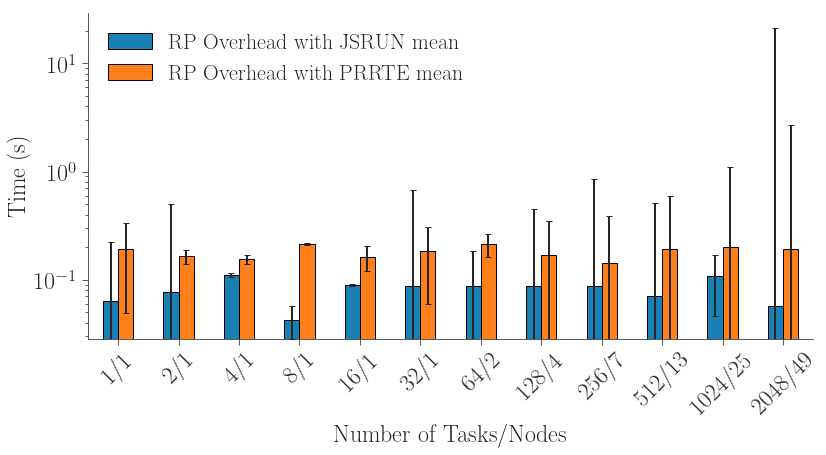

In [11]:
fig, ax = fig_setup(figsize=(13,6))

# oh = oh.fillna(0)

oh.plot.bar(
    x   ='nunitnode', 
    y   = ['RP Overhead with JSRUN mean','RP Overhead with PRRTE mean'], 
    yerr= [oh['RP Overhead with JSRUN std'],oh['RP Overhead with PRRTE std']],
    logy=True,
    width=0.5, color=[tableau20[0], tableau20[2]], ax=ax, rot=45)

ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
# ax.set_xlim(-0.5)

plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_rp_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_rp_overhead.png')

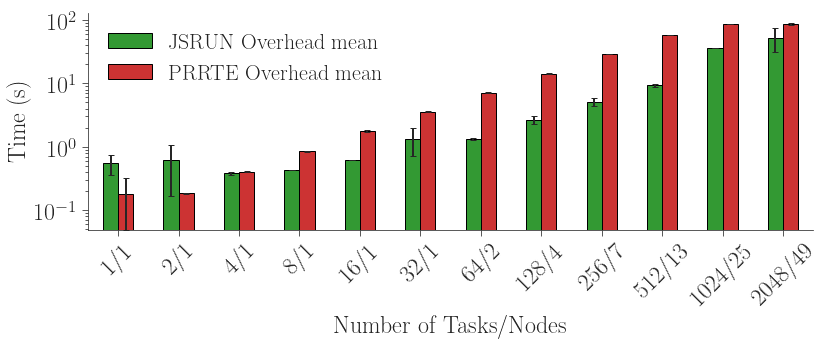

In [12]:
fig, ax = fig_setup(figsize=(13,4))

# Plot means and std bars

oh.plot.bar(
    x='nunitnode', 
    y=['JSRUN Overhead mean','PRRTE Overhead mean'], 
    yerr=[oh['JSRUN Overhead std'],oh['PRRTE Overhead std']],
    logy=True,
    width=0.5, color=[tableau20[4],tableau20[6]], ax=ax, rot=45) 


ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')

ax.set_ylim(0)
ax.set_xlim(-0.5)

plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_jsrun_prrte_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_jsrun_prrte_overhead.png')

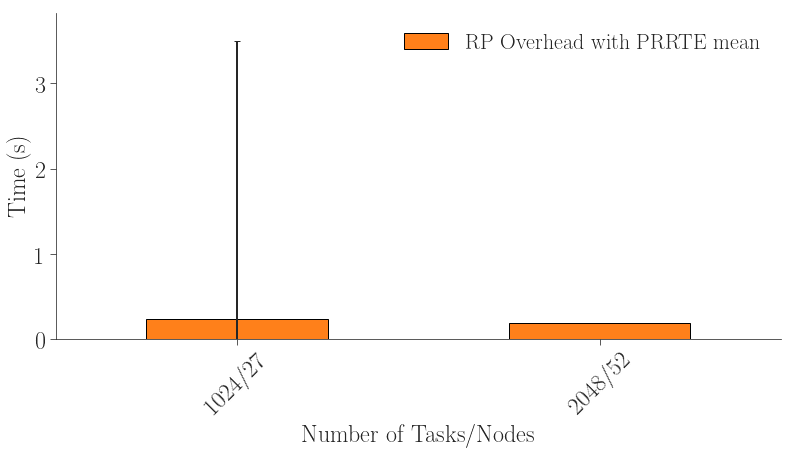

In [13]:
fig, ax = fig_setup(figsize=(13,6))

# oh = oh.fillna(0)

oh3.plot.bar(
    x   ='nunitnode', 
    y   = 'RP Overhead with PRRTE mean', 
    yerr= 'RP Overhead with PRRTE std',
    #logy=True,
    width=0.5, color=tableau20[2], ax=ax, rot=45)

ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
# ax.set_xlim(-0.5)

plt.savefig('figures/paper_prrte_stress_weak_scaling_rp_overhead_multiagent.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_stress_weak_scaling_rp_overhead_multiagent.png')

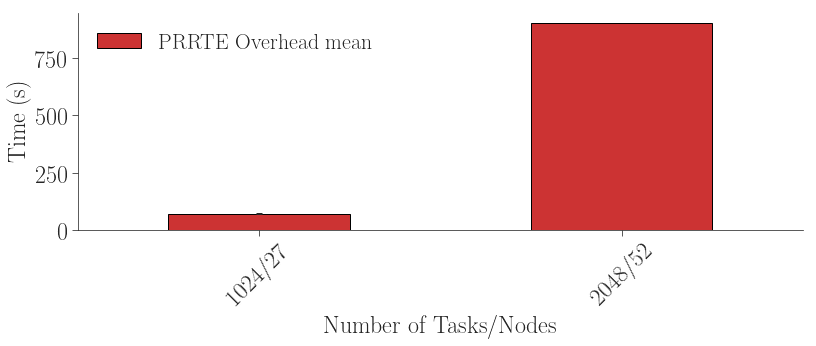

In [14]:
fig, ax = fig_setup(figsize=(13,4))

# Plot means and std bars

oh3.plot.bar(
    x='nunitnode', 
    y='PRRTE Overhead mean', 
    yerr='PRRTE Overhead std',
    #logy=True,
    width=0.5, color=tableau20[6], ax=ax, rot=45) 


ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')

ax.set_ylim(0)
ax.set_xlim(-0.5)

plt.savefig('figures/paper_prrte_stress_weak_scaling_prrte_multiagent_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_stress_weak_scaling_prrte_multiagent_overhead.png')

In [15]:
# cu_exec_start
# cu_exec_stop